## Customer Churn Prediction – Banking

## Import packages

In [1]:
#Import python libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix #Calculate confusion matrix
from xgboost import XGBClassifier

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Functions

**Function to Train and Test Machine Learning Model**

In [2]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

**Function to plot Confusion Matrix**

In [3]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    print(cm[1][0])

## Import data

**Import the data file 'Churn_Modelling.csv'**

In [4]:
data = pd.read_csv("../input/telco-customer-churn/Churn_Modelling.csv")
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


## Display basic statistics

**Display Information (info) about the 'data'**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<font color='blue'>**COMMENTS :** There is no missing data (all the columns have 10,000 rows)</font>

**Display basic statistics (description) about the 'data' - numerical**

In [6]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Display basic statistics (description) about the 'data' - categorical**

In [7]:
data.select_dtypes(include=['object']).describe(include='all')

,Surname,Geography
count,10000,10000
unique,2932,3
top,Smith,France
freq,32,5014


<font color='blue'>**OBSERVATION :** We need to convert above categorical columns to numerical columns</font>

## Convert categorical columns to numerical columns

**Convert categorical columns of 'data' to numerical columns**

In [8]:
data=pd.get_dummies(data)

In [9]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,0,0,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,0,0,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,0,0,1


<font color='blue'>**COMMENTS :** It can be observed additional columns are formed after converting from categorical to numerical columns</font>

In [10]:
data.shape

(10000, 2945)

<font color='blue'>**COMMENTS :** It can be observed that original 12 columns have now become 2945 columns after converting from categorical to numerical columns</font>

## Create feature and target set

**Remove 'Exited' column from Feature set(X) and create Target set(y) with 'price' column**

In [11]:
#Create a training set by dropping target column
X = data.drop('Exited',axis = 1) 

#Create the target set (output)
y = data.Exited

In [12]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abazu,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,...,0,0,0,0,0,0,0,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,...,0,0,0,0,0,0,0,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,0,0,1


## Scaling the data values to standardize the range of independent variables

**Normalize the feature set X**

In [13]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [14]:
print(X)

[[-0.32622142 -1.09598752  0.29351742 ...  0.99720391 -0.57873591
  -0.57380915]
 [-0.44003595 -1.09598752  0.19816383 ... -1.00280393 -0.57873591
   1.74273971]
 [-1.53679418 -1.09598752  0.29351742 ...  0.99720391 -0.57873591
  -0.57380915]
 ...
 [ 0.60498839 -1.09598752 -0.27860412 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 1.25683526  0.91241915  0.29351742 ... -1.00280393  1.72790383
  -0.57380915]
 [ 1.46377078 -1.09598752 -1.04143285 ...  0.99720391 -0.57873591
  -0.57380915]]


<font color='blue'>**COMMENTS :** It can be observed that range of values is normalized</font>

## Split the data into "train" and "test" set

**Split the Feature set (X) and Target set (y) into training set (X_train, y_train) and testing set (X_test,y_test)**

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print("X_train size ==>", X_train.shape)
print("X_test size ==>", X_test.shape)

X_train size ==> (7000, 2944)
X_test size ==> (3000, 2944)


<font color='blue'>**COMMENTS :** Total data (10,000 rows) is divided into Training set(7,000 rows) and Testing set (3,000 rows)</font>

## <font color='blue'>Support Vector Machine (SVM) ML model</font>

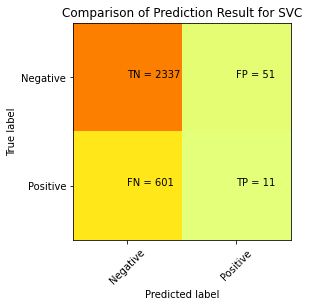

601
Accuracy of the Model SVC 78.3%


In [16]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>XG Boost Classifer ML model</font>

[03:02:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


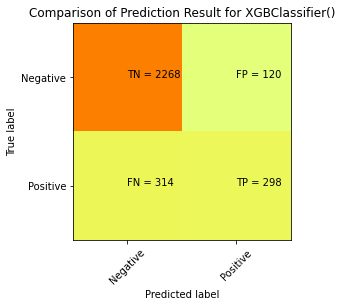

314
Accuracy of the Model XGBClassifier() 85.5%


In [17]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Gaussian Naive Bayes ML model</font>

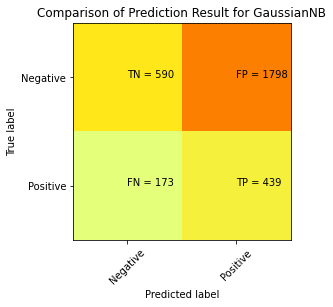

173
Accuracy of the Model GaussianNB 34.3%


In [18]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>SGD Classifier ML model</font>

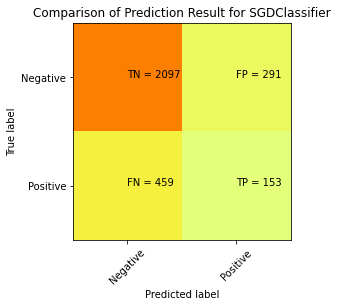

459
Accuracy of the Model SGDClassifier 75.0%


In [19]:
from sklearn.linear_model import SGDClassifier #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Logistic Regression) ML model</font>

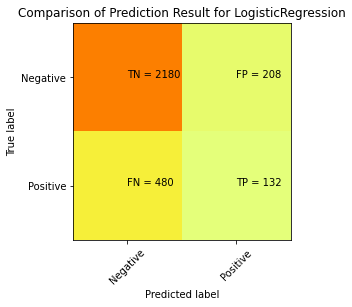

480
Accuracy of the Model LogisticRegression 77.1%


In [20]:
from sklearn.linear_model import LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Decision Tree Classifier ML model</font>

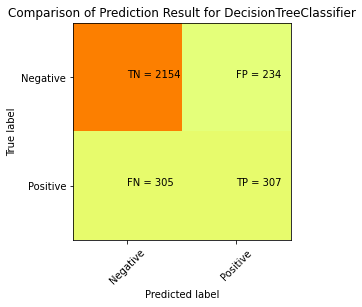

305
Accuracy of the Model DecisionTreeClassifier 82.0%


In [21]:
from sklearn.tree import DecisionTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Extra Tree Classifier ML model</font>

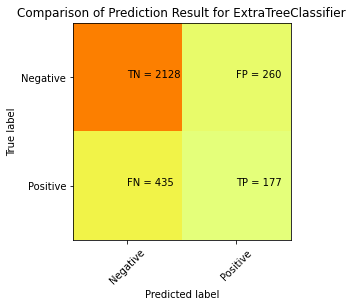

435
Accuracy of the Model ExtraTreeClassifier 76.8%


In [22]:
from sklearn.tree import ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Quadratic Discriminant Analysis ML model</font>

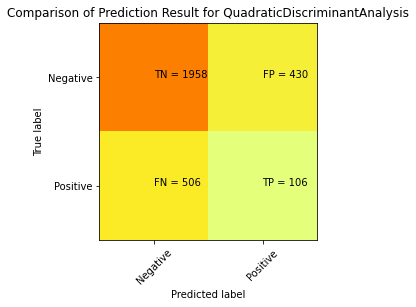

506
Accuracy of the Model QuadraticDiscriminantAnalysis 68.8%


In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Liner Discriminant Analysis ML model</font>

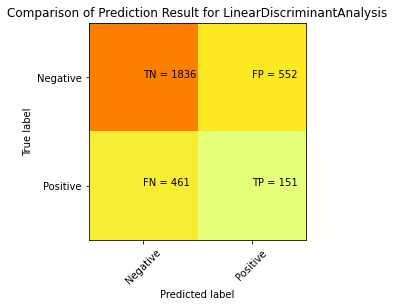

461
Accuracy of the Model LinearDiscriminantAnalysis 66.2%


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Random Forest Classifier ML model</font>

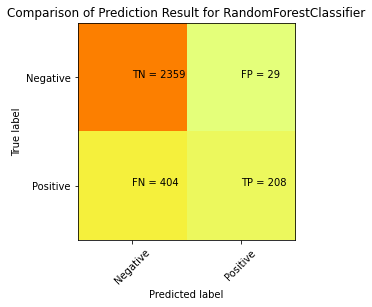

404
Accuracy of the Model RandomForestClassifier 85.6%


In [25]:
from sklearn.ensemble import RandomForestClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Ada Boost Classifier ML model</font>

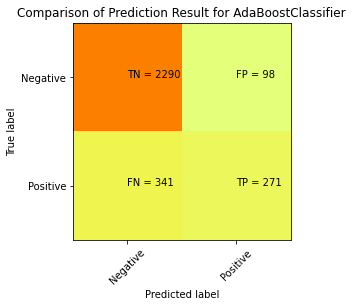

341
Accuracy of the Model AdaBoostClassifier 85.4%


In [26]:
from sklearn.ensemble import AdaBoostClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

## <font color='blue'>Gradient Boosting Classifier ML model</font>

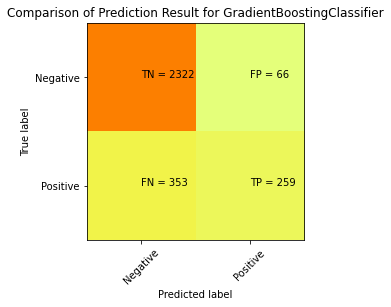

353
Accuracy of the Model GradientBoostingClassifier 86.0%


In [27]:
from sklearn.ensemble import GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

-- Conclusion: GradientBoosting Classifier had the best model accuracy for predicting the customer Churn.
